# Neural_network_two_layer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import heapq
%matplotlib inline

In [2]:
#Load MNIST data
mnist = fetch_mldata('MNIST original')#, data_home = custom_data_home)
X, y = mnist.data.astype(float) , mnist.target.astype(int)


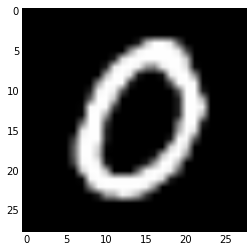

0


In [3]:
#Show a number
fig_n = 300
plt.imshow(X[fig_n,:].reshape(28,28), cmap="Greys_r")
plt.show()
print y[fig_n]


#print mnist.data.shape[0], np.shape(X_train)
#print mnist.target.shape
#print np.unique(mnist.target)
#print mnist.data.shape[1]

1.Preprocessing

In [4]:
#Check data distribution
y_dict = {}

for i in y:
    if y_dict.get(i) is None:
        y_dict[i] = 1
    else:
        y_dict[i] += 1

for key, value in y_dict.items():
    y_dict[key] = value / float(len(y))
    print '%d : %.3f' %(key, y_dict[key])


0 : 0.099
1 : 0.113
2 : 0.100
3 : 0.102
4 : 0.097
5 : 0.090
6 : 0.098
7 : 0.104
8 : 0.098
9 : 0.099


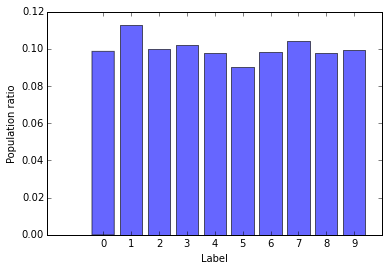

In [5]:
#Plot data distribution

bins = np.linspace(-0.5,9.5,num = 11)
plt.hist(y,bins,alpha=.6,normed = 1,rwidth = .8,label = 'Original ratings')
#plt.legend(loc='upper left')
plt.xlabel('Label')
plt.ylabel('Population ratio')
plt.xticks(np.linspace(0.0,9,num = 10))
plt.show()

In [6]:
#Normalization
X /= X.max()

#Zero mean
avg = np.mean(X,axis = 0)
X -=  avg

#PCA

def pca(imox_mtx, k):
    imox_sctr = np.dot(imox_mtx.T, imox_mtx)
    imox_eigval, imox_eigvec = np.linalg.eig(imox_sctr)
    per = np.real(np.sum(imox_eigval[:k])/ np.sum(imox_eigval))
    print  'percentage: %.4f'%(per), ', number of features: %d' %(k)
    
    max_pos = heapq.nlargest(k, xrange(len(imox_eigval)), key=imox_eigval.__getitem__)
    transmtx = imox_eigvec[:,max_pos]  
    return per, transmtx


percentage: 1.0000 , number of features: 784
percentage: 1.0000 , number of features: 756
percentage: 1.0000 , number of features: 729
percentage: 1.0000 , number of features: 702
percentage: 1.0000 , number of features: 675
percentage: 1.0000 , number of features: 648
percentage: 1.0000 , number of features: 621
percentage: 0.9999 , number of features: 594
percentage: 0.9999 , number of features: 567
percentage: 0.9997 , number of features: 540
percentage: 0.9994 , number of features: 513
percentage: 0.9990 , number of features: 486
percentage: 0.9984 , number of features: 459
percentage: 0.9974 , number of features: 432
percentage: 0.9961 , number of features: 405
percentage: 0.9943 , number of features: 378
percentage: 0.9919 , number of features: 351
percentage: 0.9893 , number of features: 324
percentage: 0.9859 , number of features: 297
percentage: 0.9817 , number of features: 270
percentage: 0.9768 , number of features: 243
percentage: 0.9708 , number of features: 216
percentage

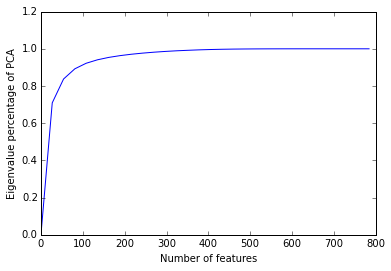

In [7]:
#plot pca percentage vs features
f_num = np.linspace(784,0,30).astype(int)
pca_per = [pca(X,i)[0] for i in f_num]

plt.plot(f_num, pca_per)
plt.xlabel('Number of features')
plt.ylabel('Eigenvalue percentage of PCA')
plt.show()

In [7]:
#PCA transformation
per, transmtx = pca(X,392)
X = np.dot(transmtx.T, X.T)
X = X.T

KeyboardInterrupt: 

In [12]:
#Partition into original train and test to compare with teammates. 
X_train0, X_test0 = X[:60000], X[60000:]
y_train0, y_test0 = y[:60000], y[60000:]

#Randomlize data since it's put in order from 0 to 9
loc = range(70000)
np.random.shuffle(loc)
X = X[loc,:]
y =  y[loc]

#Partition into two sets / 2-fold CV
parti = X.shape[0]/2
X_train, X_test = X[:parti], X[parti:]
y_train, y_test = y[:parti], y[parti:]
#print np.shape(X_train), type(y_train)

 (35000, 784) <type 'numpy.ndarray'>


In [10]:
class neural_net_two_layer():
    
    def __init__(self, X_train, Y_train, step_size = 0.1, reg = 0.001, h_size = 10, niter = 10000):
        
        self.X = X_train
        self.Y = Y_train
        
        self.step_size = step_size
        self.reg = reg
        self.h = h_size
        self.niter = niter
        
        self.ndata = np.shape(self.X)[0]
        self.ndim = np.shape(self.X)[1]
        self.nclass = len(np.unique(self.Y))
   
        self.wt_ini = 0.02
        
        self.wt = self.wt_ini * np.random.randn(self.ndim, self.h)
        self.b = np.zeros(self.h)
        
        self.wt2 = self.wt_ini * np.random.randn(self.h, self.nclass)
        self.b2 = np.zeros(self.nclass)
  
        
    def model(self):
        
        wt = self.wt
        b = self.b
        wt2 = self.wt2
        b2 = self.b2
        loss = 3
        
        for i in range(self.niter):
 
            hidden_layer = np.maximum(0, np.dot(self.X, wt) + b)
 
            scores = np.dot(hidden_layer, wt2) + b2
            exp_scores = np.exp(scores)         
            probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
            corect_logprobs = -np.log(probs[range(self.ndata),self.Y])
  
            data_loss = np.sum(corect_logprobs)/self.ndata

            reg_loss = .5 * self.reg * np.sum((wt*wt)) + .5 *self.reg*np.sum((wt2*wt2))
            loss_new = data_loss + reg_loss
            
            if (i%100 == 0 or i == self.niter-1):
                print 'iteration: %d, loss: %f' %(i, loss_new)
                #print np.sum(wt2), np.sum(b2)
            """    
            if (abs(loss-loss_new)/loss < 0.001 and i > 1):
                print 'break condition match: ', (loss-loss_new)/loss, loss
                break
            """
            loss = loss_new
            
            grads = {} 
            dscores = probs
            dscores[range(self.ndata),self.Y] -= 1
            dscores /= self.ndata         
 
            grads['wt2'] = np.dot(hidden_layer.T, dscores)
            grads['b2'] = np.sum(dscores, axis = 0)
            dhidden = np.dot(dscores, wt2.T)
            dhidden[hidden_layer <=0] = 0
            grads['wt'] = np.dot(self.X.T, dhidden)
            grads['b'] = np.sum(dhidden, axis = 0)

            grads['wt2'] += self.reg * wt2
            grads['wt'] += self.reg * wt

            wt2 = wt2 - self.step_size * grads['wt2']
            wt = wt - self.step_size * grads['wt']
            b2 = b2 - self.step_size * grads['b2']
            b =  b - self.step_size * grads['b']
        
        self.wt2, self.wt = wt2, wt
        self.b2, self.b = b2, b

        return loss
        
    def predict(self, X_test):
            
        wt = self.wt
        b = self.b
        wt2 = self.wt2
        b2 = self.b2
        
        hidden_layer = np.maximum(0, np.dot(X_test,wt) + b)
        scores = np.dot(hidden_layer, wt2) + b2
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
        Y_pred = probs.argmax(axis = 1)
        
        return Y_pred
        
        
    def accuracy(self, Y_testset, Y_pred):
        
        accu_array = [1 if Y_testset[i:i+1]==Y_pred[i:i+1] else 0 for i in range(len(Y_testset)) ]
        #print accu_array
        #print Y_testset, Y_pred
        accu = sum(accu_array)/np.double(len(Y_testset))
        #print 'accuracy: %.2f' % (accu)*100, '%'
        return accu


In [11]:
# accu1: use train as train, test as tet
iter_times = 5000
nntl = neural_net_two_layer(X_train, y_train, h_size = 10, reg = 0.001,niter = iter_times)
import time as ti
st = ti.time()
nntl.model()
print ti.time()-st

y_tepd = nntl.predict(X_test[:,:])
acc1 = nntl.accuracy(y_test[0:],y_tepd)
print acc1

iteration: 0, loss: 2.303301
iteration: 100, loss: 1.847379
iteration: 200, loss: 0.887796
iteration: 300, loss: 0.616349
iteration: 400, loss: 0.493352
iteration: 500, loss: 0.428420
iteration: 600, loss: 0.393172
iteration: 700, loss: 0.370923
iteration: 800, loss: 0.355433
iteration: 900, loss: 0.343741
iteration: 1000, loss: 0.334567
iteration: 1100, loss: 0.327108
iteration: 1200, loss: 0.320842
iteration: 1300, loss: 0.315464
iteration: 1400, loss: 0.310730
iteration: 1500, loss: 0.306486
iteration: 1600, loss: 0.302654
iteration: 1700, loss: 0.299186
iteration: 1800, loss: 0.296020
iteration: 1900, loss: 0.293113
iteration: 2000, loss: 0.290452
iteration: 2100, loss: 0.287999
iteration: 2200, loss: 0.285731
iteration: 2300, loss: 0.283626
iteration: 2400, loss: 0.281665
iteration: 2500, loss: 0.279845
iteration: 2600, loss: 0.278146
iteration: 2700, loss: 0.276543
iteration: 2800, loss: 0.275035
iteration: 2900, loss: 0.273615
iteration: 3000, loss: 0.272290
iteration: 3100, los

In [12]:
# accu2: use train as test, test as train
nntl = neural_net_two_layer(X_test, y_test, niter = 10000, h_size = 10, reg = 0.001)
import time as ti
st = ti.time()
nntl.model()
print ti.time()-st

y_trpd = nntl.predict(X_train[:,:])
acc2 = nntl.accuracy(y_train[0:],y_trpd)
print acc2


iteration: 0, loss: 2.303563
iteration: 100, loss: 1.695314
iteration: 200, loss: 0.916458
iteration: 300, loss: 0.583833
iteration: 400, loss: 0.460877


KeyboardInterrupt: 

In [ ]:
# 2-fold average accuracy
print 'average accuracy: %.4f' %(100*(acc1+acc2)/2.), '%'

In [ ]:
xh = [2,5,10,20]
yh = [70.29,88.55,93.33,95.32]
plt.plot(xh,yh)
plt.plot(xh,yh,'o')
plt.xlabel('Hidden layer size')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
xh = [0.0001,0.001,0.01,0.1]
yh = [93.37,93.33,91.87,85.04]
plt.plot(xh,yh,'o')

In [ ]:
#Use last 10000 as test

nntl = neural_net_two_layer(X_train0, y_train0, h_size = 20, reg = 0.001)
import time as ti
st = ti.time()
nntl.model()
print ti.time()-st

y_tepd0 = nntl.predict(X_test0[:,:])
acc = nntl.accuracy(y_test0[0:],y_tepd0)
print acc